In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 10.3: Quanifying Epistemic Uncertainty in Monte Carlo estimates

## Objectives

+ To quantify the epistemic uncertainty in Monte Carlo estimates.


## The central limit theorem comes to the rescue

Remember that we are working with an expectation of the form:
$$
I = \mathbb{E}[g(X)]=\int g(x) p(x) dx,
$$
where $X\sim p(x)$ and $g(x)$ is a function of $x$.
Our sampling-based approximation starts by taking $X_1,X_2,\dots$ be independent copies of $X$.
Then, it uses the random variables $Y_1 = g(X_1), Y_2 = g(X_2), \dots$, which are also independent and identically distributed.
Invoking the strong law of large states we saw that sampling average of the $Y_i$'s converges to their mean:
$$
\bar{I}_N=\frac{g(X_1)+\dots+g(X_N)}{N}=\frac{Y_1+\dots+Y_N}{N}\rightarrow I,\;\text{a.s.}
$$
A couple of videos ago, we observed that for fixed $N$ this estimate can vary widely.
In this hands-on we are going to demonstrate how one can use the Central Limit Theorem (CLT) to quantify the epistemic uncertainty of $I_N$.

Note that the variables $Y_i = g(X_i)$ are independent identical distributed with mean:
$$
\mathbb{E}[Y_i] = \mathbb{E}[g(X_i)] = I.
$$
Assume that their variance is finite, i.e.,
$$
\mathbb{V}[Y_i] = \sigma^2 < +\infty.
$$
Yes, it is possible for a random variable to have a infinite variance.
The CLT would not work in that case.
Okay. If the variance of the $Y_i$'s is indeed finite, the CLT applies for them, and you get that their sampling average $\bar{I}_N$ becomes approximately normally distributed for large $N$, i.e.,
$$
\bar{I}_N \sim N\left(I, \frac{\sigma^2}{N}\right),
$$
for large $N$.
Now, we may rewrite this equation as:
$$
\bar{I}_N = I + \frac{\sigma}{\sqrt{N}}Z,
$$
where $Z\sim N(0,1)$ is a standard normal (look at our Lecture 6 to remind yourself why $X = \mu + \sigma Z$ follows $N(\mu,\sigma^2)$ if $Z$ follows a $N(0,1)$).
It's like saying $I_N$ is $I$ plus some zero mean noise with a given variance.
But it is not ad hoc, this is exactly what the CLT says.
Now take this equation and solve for $I$:
$$
I = \bar{I}_N - \frac{\sigma}{\sqrt{N}}Z.
$$
This says that the true value of the expectation $I$ is $I_N$ minus some zero mean noise with a given variance.
Going back to distributions:
$$
I \sim N\left(\bar{I}_N, \frac{\sigma^2}{N}\right),
$$
where the minus sign disappears because we had to square it.
This would be exactly what we were after, except from the fact that we don't really know what $\sigma^2$ is...
Well, let's approximate it also with sampling-average!
We did this already in Video 4 of Lecture 8.
Set:
$$
\sigma_N^2 = \frac{1}{N}\sum_{j=1}^Ng^2(X_j) - \bar{I}_N^2.
$$
And now we can say that:
$$
I \sim N\left(\bar{I}_N, \frac{\bar{\sigma}^2_N}{N}\right),
$$
where of course you need to keep in mind that this is only valid for large $N$
It is also possible to think about this in terms of predictive quantiles for $I$.
We can write something like:
$$
I \approx \bar{I}_N \pm \frac{2}{\sqrt{N}}\bar{\sigma}_N,
$$
with (about) $95\%$ probability (see Video 3 of Lecture 9).

Alright, let's see this in practice.

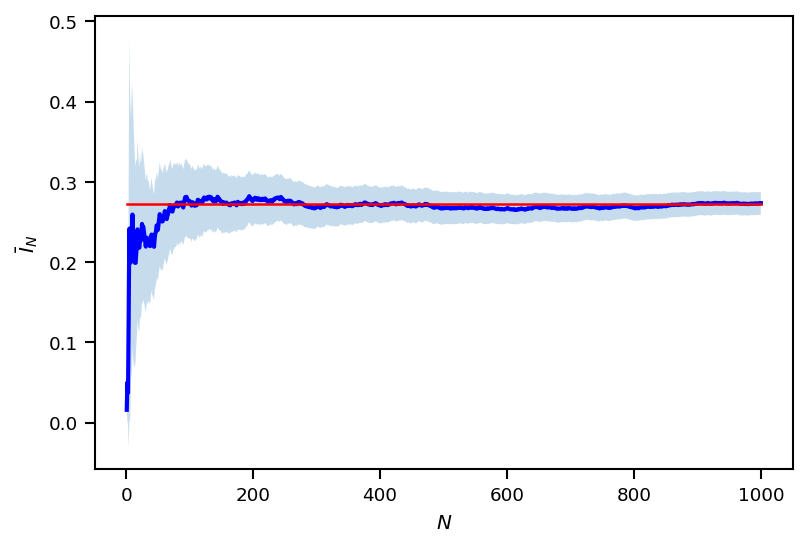

In [15]:
# The function of x we would like to consider
g = lambda x: np.sin(x)**2
g1 = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Number of samples to take
N = 1000

# Generate samples from X
x_samples = np.random.rand(N)

# Get the corresponding Y's
y_samples = g(x_samples)

# Evaluate the sample average for all sample sizes (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)

# Evaluate the sample average for the squared of Y
g2_running = np.cumsum(y_samples ** 2) / np.arange(1, N + 1)

# Evaluate the running average of the variance
sigma2_running = g2_running - I_running ** 2

# Alright, now we have quantified our uncertainty about I for every N
# from a single MC run. Let's plot a (about) 95% predictive interval
# Running lower bound for the predictive interval
I_lower_running = I_running - 2.0 * np.sqrt(sigma2_running / np.arange(1, N + 1))
# Running upper bound for the predictive interval
I_upper_running = I_running + 2.0 * np.sqrt(sigma2_running / np.arange(1, N + 1))

# A common plot for all estimates
fig, ax = plt.subplots(dpi=150)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), I_lower_running, I_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), I_running, 'b', lw=2)
# The true value
ax.plot(np.arange(1, N+1), [0.27267] * N, color='r')
# and the labels
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{I}_N$');

## Questions

+ Increase ``N`` until you get an answer that is close enough to the correct answer (the red line). Notice how the epistemic error bars shrink around the true value.